In [44]:
import pandas as pd
import numpy as np


In [6]:
train=pd.read_csv("../input/ods-mlclass-dubai-2019-03-lecture3-hw/train.csv")
train.head()

,uid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uid             32561 non-null  int64  
 1   age             32561 non-null  int64  
 2   workclass       32561 non-null  object 
 3   fnlwgt          32561 non-null  float64
 4   education       32561 non-null  object 
 5   education-num   32561 non-null  float64
 6   marital-status  32561 non-null  object 
 7   occupation      32561 non-null  object 
 8   relationship    32561 non-null  object 
 9   race            32561 non-null  object 
 10  sex             32561 non-null  object 
 11  capital-gain    32561 non-null  float64
 12  capital-loss    32561 non-null  float64
 13  hours-per-week  32561 non-null  float64
 14  native-country  32561 non-null  object 
 15  target          32561 non-null  int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 4.0+ MB


In [8]:
train.isnull().sum()

uid               0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,32561.0,16280.000000,9399.695394,0.0,8140.0,16280.0,24420.0,32560.0
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
target,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [14]:

continuous=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']
target=["target"]
id=["uid"]
train.columns
categorical=['workclass','education','marital-status', 'occupation', 'relationship', 'race','sex', 'native-country']
len(train.columns), len(continuous+target+id+categorical)

(16, 16)

In [15]:
train.head()

,uid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [19]:
train.groupby(["education","education-num"]).size().reset_index().sort_values("education-num")

,education,education-num,0
13,Preschool,1.0,51
3,1st-4th,2.0,168
4,5th-6th,3.0,333
5,7th-8th,4.0,646
6,9th,5.0,514
0,10th,6.0,933
1,11th,7.0,1175
2,12th,8.0,433
11,HS-grad,9.0,10501
15,Some-college,10.0,7291


In [22]:
for col in categorical:
    print(col,train[col].nunique())
    print(train[col].value_counts())

workclass 9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education 16
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
marital-status 7
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
occupation 15
 Prof-specialt

In [25]:
train.target.value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [26]:
test=pd.read_csv("../input/ods-mlclass-dubai-2019-03-lecture3-hw/test.csv")
test["target"]=-1
data=pd.concat([train,test],ignore_index=True)
data.head()

,uid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [28]:
# for col in categorical:
#     print(col,data[col].nunique())
#     # print(data[col].value_counts())
#     print(data[col])
data.isnull().sum()

uid               0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [29]:
continuous=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']
target=["target"]
id=["uid"]
train.columns
categorical=['workclass','education','marital-status', 'occupation', 'relationship', 'race','sex', 'native-country']

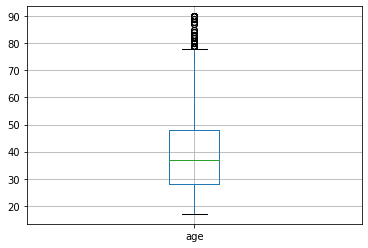

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
test[[continuous[0]]].boxplot()

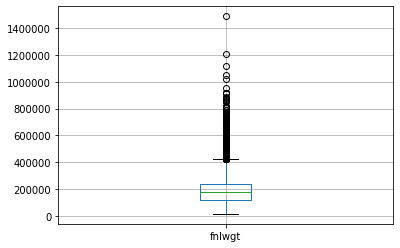

In [38]:
test[[continuous[1]]].boxplot()

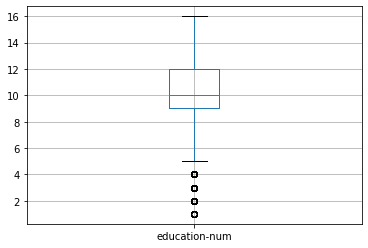

In [39]:
test[[continuous[2]]].boxplot()

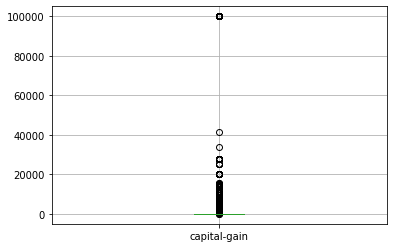

In [40]:
test[[continuous[3]]].boxplot()

In [51]:
test[continuous[3]].head()

0       0.0
1       0.0
2       0.0
3    7688.0
4       0.0
Name: capital-gain, dtype: float64

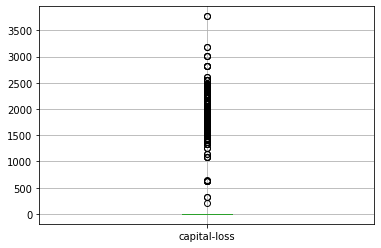

In [52]:
test[[continuous[4]]].boxplot()

In [63]:
test[continuous[4]].describe()

count    16281.000000
mean        87.899269
std        403.105286
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3770.000000
Name: capital-loss, dtype: float64

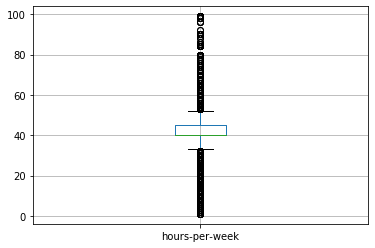

In [56]:
test[[continuous[5]]].boxplot()

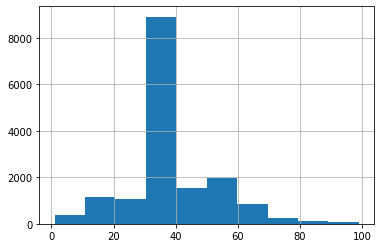

In [59]:
test[continuous[5]].hist()

In [66]:
from sklearn.preprocessing import LabelEncoder
for col in categorical:
    print(col)
    enc=LabelEncoder()
    data[col]=enc.fit_transform(data[col].values.reshape(-1,1)).flatten()
data.head()

workclass
education
marital-status
occupation
relationship
race
sex
native-country


,uid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0,39,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,0
1,1,50,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,0
2,2,38,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,0
3,3,53,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,0
4,4,28,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,0


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,48842.0,24421.166680,14100.385087,0.0,12210.25,24420.5,36632.75,48843.0
age,48842.0,38.643585,13.710510,17.0,28.00,37.0,48.00,90.0
workclass,48842.0,3.870439,1.464234,0.0,4.00,4.0,4.00,8.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.50,178144.5,237642.00,1490400.0
education,48842.0,10.288420,3.874492,0.0,9.00,11.0,12.00,15.0
education-num,48842.0,10.078089,2.570973,1.0,9.00,10.0,12.00,16.0
marital-status,48842.0,2.618750,1.507703,0.0,2.00,2.0,4.00,6.0
occupation,48842.0,6.577700,4.230509,0.0,3.00,7.0,10.00,14.0
relationship,48842.0,1.443287,1.602151,0.0,0.00,1.0,3.00,5.0
race,48842.0,3.668052,0.845986,0.0,4.00,4.0,4.00,4.0


In [70]:
train=data[data["target"]!=-1]
test=data[data["target"]==-1]
len(train),len(test)

(32561, 16281)

In [84]:
# test.shape

(16281, 16)

In [102]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
NFOLDS=6
skf = StratifiedKFold(n_splits=NFOLDS)
X=train.drop(target+id,axis=1).values
y=train.target.values

X_test=test.drop(id+target,axis=1).values
preds=np.zeros((X_test.shape[0],))
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(X_train.shape,X_val.shape)
    clf=DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    pval=clf.predict(X_val)
    print(roc_auc_score(y_val,pval))
    pred_test=clf.predict(X_test)
    preds+=pred_test

preds=preds/NFOLDS
sub=pd.DataFrame()
sub["uid"]=test.reset_index()["uid"]

sub["target"]= preds
sub.head()





(27134, 14) (5427, 14)
0.7419087660914717
(27134, 14) (5427, 14)
0.7371992482599298
(27134, 14) (5427, 14)
0.7509053193781059
(27134, 14) (5427, 14)
0.7453437799451793
(27134, 14) (5427, 14)
0.7561791993819688
(27135, 14) (5426, 14)
0.7510816396318708


,uid,target
0,32563,0.0
1,32564,0.0
2,32565,0.5
3,32566,1.0
4,32567,0.0


In [103]:
sub.to_csv("submit.csv",index=None)

In [104]:
preds.shape,X_test.shape

((16281,), (16281, 14))

In [98]:
test.head()

,uid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
32561,32563,25,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39,-1
32562,32564,38,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39,-1
32563,32565,28,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39,-1
32564,32566,44,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39,-1
32565,32567,18,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39,-1
